In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Новый раздел

In [2]:
df = pd.read_csv('new_dataframe.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


In [4]:
#округлим значения дистанции(км) до десятых, для более простой группировки

df['distance'] = round(df['distance'], 1)
df.head()

,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,867689,12,iOS,business,no surge,1,1,1,1,0,0,8.0,20,low
1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.9,27,high
2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.2,21,high
3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.9,52,low
4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.7,19,low


Метрика: Дистанция в заказе

In [5]:
df['distance'].describe()
print('среднее       = ', round(df['distance'].mean(),1))
print('медиана       = ', df['distance'].median())
print('перцентиль 95 = ', df['distance'].quantile(0.95))

среднее       =  5.4
медиана       =  4.3
перцентиль 95 =  13.7


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


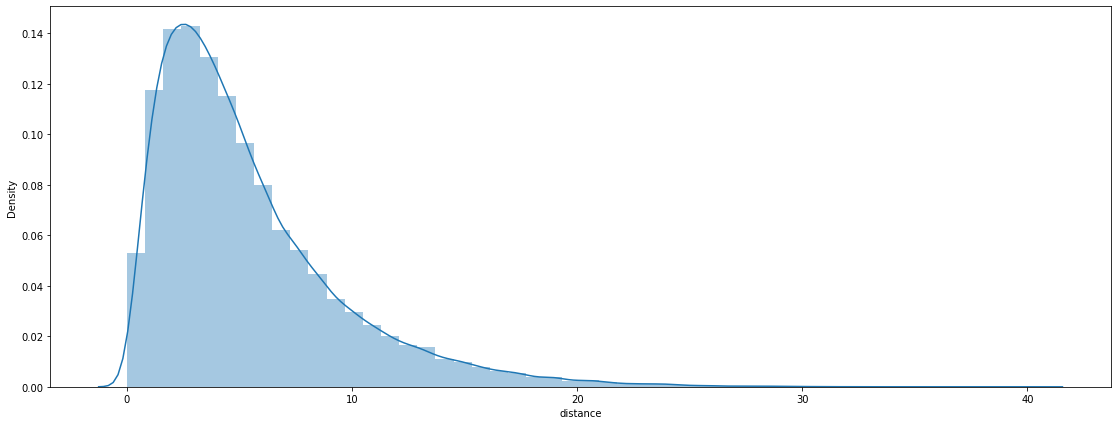

In [6]:
ax = plt.subplots(figsize=(19,7))
sns.distplot(df['distance'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


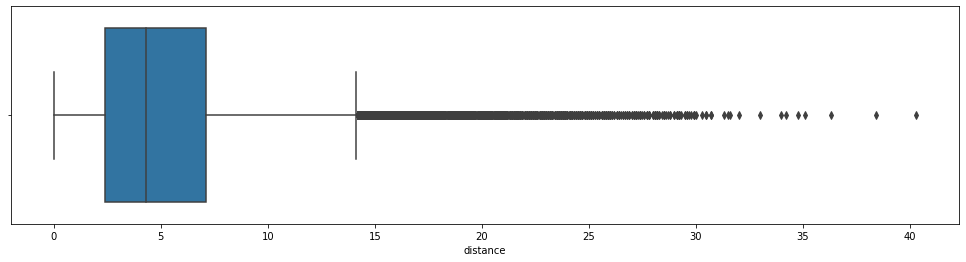

In [7]:
ax = plt.subplots(figsize=(17,4))
sns.boxplot(df['distance'])

Метрика: Возраст клиента

In [8]:
print('среднее       = ', round(df['age'].mean(),1))
print('медиана       = ', df['age'].median())
print('перцентиль 95 = ', df['age'].quantile(0.95))

среднее       =  25.9
медиана       =  24.0
перцентиль 95 =  42.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


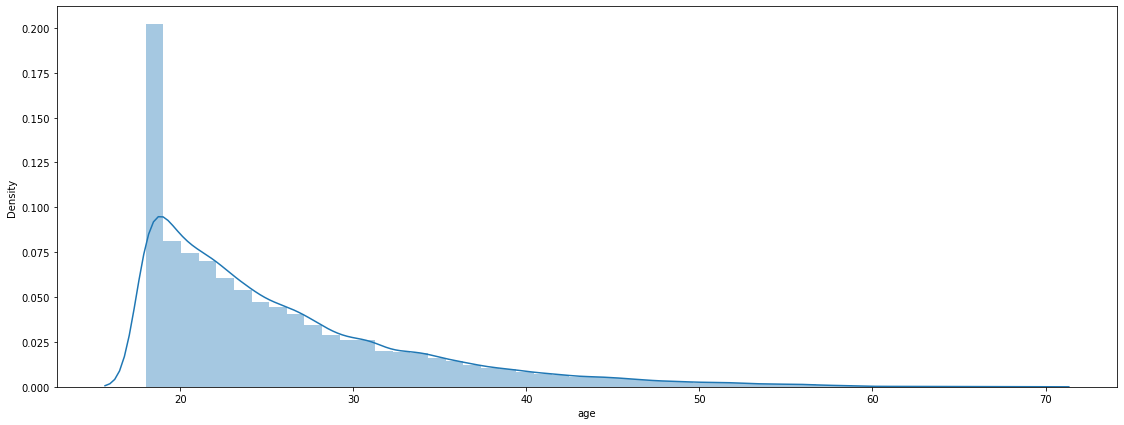

In [9]:
ax = plt.subplots(figsize=(19,7))
sns.distplot(df['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


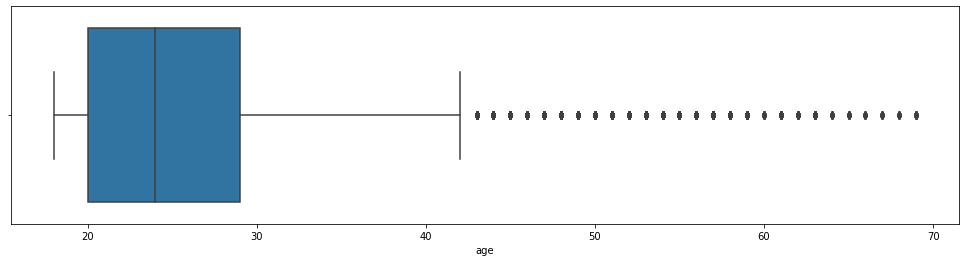

In [10]:
ax = plt.subplots(figsize=(17,4))
sns.boxplot(df['age'])

Метрика: Конверсия в заказ (по пользователям)

In [11]:
#выбрали тех, кто увидел цену и сделал заказ
users_order_count = df.query('price_seen == 1 and order_made == 1') \
    .groupby('user_id', as_index=False) \
    .agg({'hour':'count'}) \
    .rename(columns={'hour':'order_count'})

#выбрали всех кто увидел цену (сделал заказ + не сделал заказ)
users_seen_price = df.query('price_seen == 1') \
    .groupby('user_id', as_index=False) \
    .agg({'hour':'count'}) \
    .rename(columns={'hour':'seen_price'})

#объединяем 2таблицы через left-join
conv_to_ride = users_order_count.merge(users_seen_price, on='user_id', how='left').fillna(0)
conv_to_ride['conv_to_ride'] = round(conv_to_ride.order_count / conv_to_ride.seen_price,2) * 100
conv_to_ride.head()

,user_id,order_count,seen_price,conv_to_ride
0,100093,3,4,75.0
1,100118,5,5,100.0
2,100134,4,5,80.0
3,100166,4,5,80.0
4,100255,5,9,56.0


In [12]:
print('среднее       = ', round(conv_to_ride['conv_to_ride'].mean(),1))
print('медиана       = ', conv_to_ride['conv_to_ride'].median())
print('перцентиль 95 = ', conv_to_ride['conv_to_ride'].quantile(0.95))

среднее       =  83.4
медиана       =  100.0
перцентиль 95 =  100.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


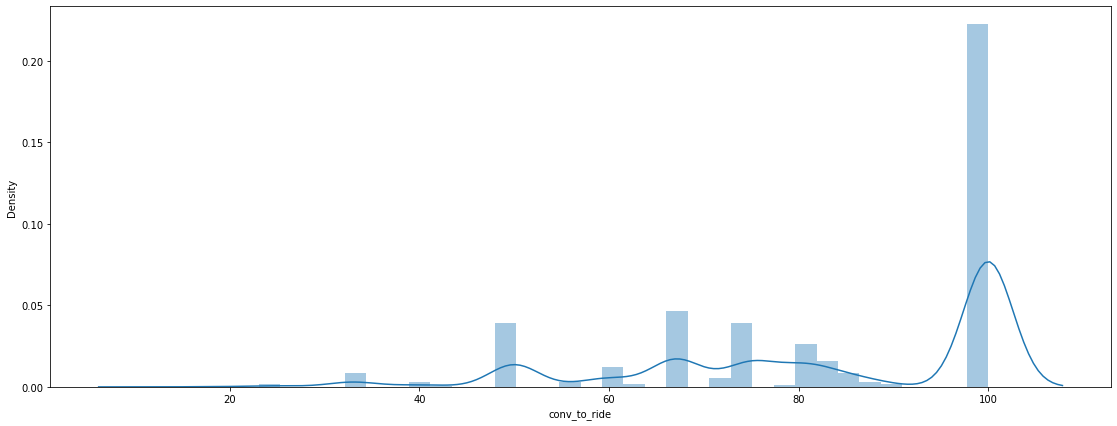

In [13]:
ax = plt.subplots(figsize=(19,7))
sns.distplot(conv_to_ride['conv_to_ride'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


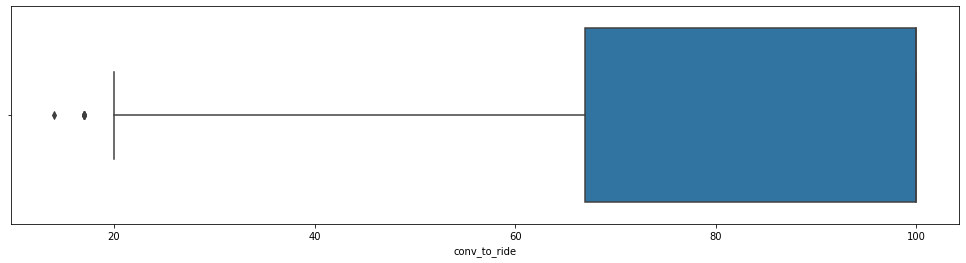

In [14]:
ax = plt.subplots(figsize=(17,4))
sns.boxplot(conv_to_ride['conv_to_ride'])